# inverse

#### Problem 1.

Consider a discrete random variable $X$ with cdf

$$ F_X(a) = \begin{cases}
0 & \text{if } a < 1,\\
0.1 & \text{if } 1 \le a < 2,\\
0.4 & \text{if } 2 \le a < 3,\\
0.9 & \text{if } 3 \le a < 4,\\
1 & \text{if } a \ge 4.
\end{cases} $$

Using the inverse transform method, generate 50 random variates from X.

*Hint.* You do not need to use a pre-existing Python function to compute cdf values; just use the ones given to you above directly.

In [1]:
# Import inf from numpy
from numpy import inf

# Import rand from numpy.random
from numpy.random import rand

# Import bisect_right from bisect
from bisect import bisect_left

# Number of random variates desired
nVariates = 50

# Sorted list of values that X can take, including -inf
a = [-inf, 1, 2, 3, 4]

# cdf at each value that X can take
cdf = [0.0, 0.1, 0.4, 0.9, 1.0]

# List of random variates
# Here, instead of a traditional for loop as we used in class,
# we put the for loop into a one-line list comprehension.
variates = [a[bisect_left(cdf, rand())] for k in range(nVariates)]
    
# Print list of variates
print("variates = {0}".format(variates))

variates = [2, 2, 4, 3, 4, 3, 2, 3, 2, 3, 3, 3, 3, 3, 4, 3, 4, 2, 2, 4, 4, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 2, 3, 3, 4, 4, 3, 4, 3, 2, 3, 3, 4, 3, 2, 3]


#### Problem 2.

a. Using the inverse transform method, generate 50 random variates from a Gamma distribution with shape parameter 13.3 and scale parameter 4.2. You'll need to use the Pro Tip from Lesson 11.

In [2]:
# Import exponential rv from scipy.stats
from scipy.stats import gamma

# Number of random variates desired
nVariates = 50

# Gamma distribution parameters
gammaShape = 13.3
gammaScale = 4.2

# List of random variates
# Here, instead of a traditional for loop as we used in class,
# we put the for loop into a one-line list comprehension.
variates = [gamma.ppf(rand(), gammaShape, scale = gammaScale) for k in range(nVariates)]

# Print list of variates
print("variates = {0}".format(variates))

variates = [71.331379658427096, 46.27515207522957, 55.740228017425281, 60.172273395158619, 37.795006286867348, 63.967689953919532, 92.513515605915188, 58.740829888245322, 37.21647036669998, 60.886022742269851, 43.906041676976074, 56.588587641999666, 42.148277412725136, 46.614044783003052, 59.975935040630141, 57.08416676895142, 58.643114092667801, 57.981735029844181, 64.166787942505934, 54.520694281958029, 44.204408981253906, 60.912462340849942, 68.264851191569278, 80.25294179439615, 52.315006537405516, 66.843505192775069, 79.4272868191523, 66.062229025170552, 77.483140979398712, 36.604178961875817, 45.065329880482125, 77.079740681796437, 41.673349262485715, 52.505907702675323, 45.981749170171092, 66.797741852684169, 63.529326294339739, 53.913464323339845, 31.765932972575694, 56.538248301224932, 49.157438239995528, 58.83816388429964, 65.8392350673614, 44.246815714732492, 73.780788302516115, 60.639889157269344, 50.397478658744134, 54.97498543546758, 91.288527826880127, 65.670263148356469

b. Do your random variates pass a Kolmogorov-Smirnov test?

Note below that we use `sorted()` to obtain a sorted <span style="color:#a00000;">copy</span> of the variates, instead of `.sort()` to sort the variates in place.
This way, the original variates remain unsorted, and so we can test them for independence later.

In [3]:
# Import sqrt from numpy
from numpy import sqrt

# Import gamma, kstwobign from scipy.stats
from scipy.stats import gamma, kstwobign

# Get the number of observations
n = len(variates)

# Sort the observations
# Use sorted() to get a sorted **copy** of the variates
# This way, we can use the original variates to test for independence later.
sortedVariates = sorted(variates)

# Compute K-S observed test statistic
d = max([max(gamma.cdf(sortedVariates[i], gammaShape, scale = gammaScale) - i/n, (i+1)/n - gamma.cdf(sortedVariates[i], gammaShape, scale = gammaScale)) for i in range(n)])

# Print K-S observed test statistic
print("K-S observed test statistic = {0}".format(d))

# Compute p-value
pValue = 1 - kstwobign.cdf(sqrt(n) * d)

# Print p-value
print("K-S p-value = {0}".format(pValue))

K-S observed test statistic = 0.14533701156336887
K-S p-value = 0.24149442381948227


The $p$-value of the K-S test is fairly large: in this case, 0.564. So, using a "standard" significance level of 0.05, we do not reject the null hypothesis of the K-S test, and statistically conclude that the variates generated in part a do indeed come from a Gamma distribution with shape 13.3 and scale 4.2. This is good news, since this is what was intended!

c. Are your random variates independent? Why or why not?

We can test for independence by plotting the autocorrelation of these random variates.

In [4]:
##### Additional setup #####
from statsmodels.tsa.stattools import acf

# Import plot, step from Matplotlib
from matplotlib.pyplot import plot

# Run Matplotlib magic to show plots directly in the notebook
%matplotlib inline

# Make Matplotlib plots display as PNG files, 
# which do not have the weird vertical line bug
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [5]:
# Compute lag-k autocorrelations of variates, for k = 0, 1, ..., 20
lagAC = acf(variates, nlags = 20)

# Print the lag-k autocorrelations
print("lag-k autocorrelations = {0}".format(lagAC))

lag-k autocorrelations = [ 1.          0.00145527 -0.17277091  0.07366557  0.04263986  0.08173381
 -0.08869341 -0.15641644  0.05375275  0.1329287  -0.1862467  -0.12561032
 -0.09510131 -0.02145881 -0.10357877 -0.29599349 -0.03536495  0.15701652
 -0.07501801 -0.03971859  0.07468404]


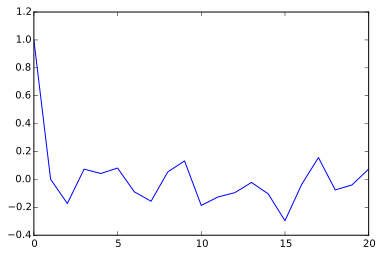

In [6]:
# Plot log-k autocorrelations
plot(lagAC)

The autocorrelations are almost all relatively small: for $k=2,\dots,20$, the absolute value of the lag-$k$ autocorrelations is less than 0.2. Even though the lag-1 autocorrelation is a bit high, one could reasonably argue that these variates are independent.